# Reconhecimento de Padrões - Openlab 01

Escolha uma foto e:

- Gerar dois histogramas um em tons de cinza e outro RGB;
- Utilizar o mesmo histograma do item anterior e gerar o contraste;
- Gerar “blur” da foto pelo cálculo da mediana;
- Binarizar a foto utilizando o método Otsu;

### Imports

In [185]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

### Reading image

In [186]:
img_path = './cat.jpg'
img = cv2.imread(img_path)

### RGB Histogram

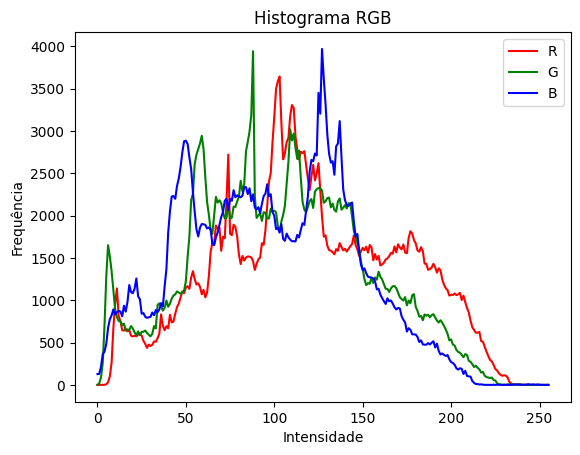

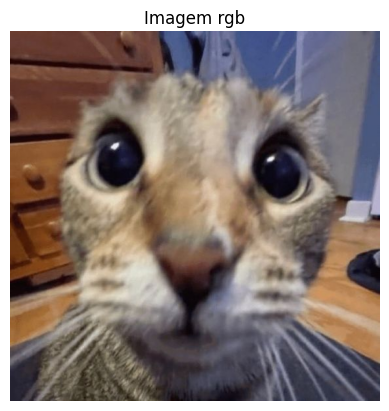

In [187]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img_rgb)

# Calcular histogramas para cada canal
hist_r = cv2.calcHist([r], [0], None, [256], [0,256])
hist_g = cv2.calcHist([g], [0], None, [256], [0,256])
hist_b = cv2.calcHist([b], [0], None, [256], [0,256])

# Plotar os histogramas
plt.figure()
plt.title('Histograma RGB')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.plot(hist_r, color='red', label='R')
plt.plot(hist_g, color='green', label='G')
plt.plot(hist_b, color='blue', label='B')
plt.legend()
plt.show()

# Display image
plt.imshow(img_rgb, cmap='gray')
plt.title('Imagem rgb')
plt.axis('off')
plt.show()

### Gray Histogram

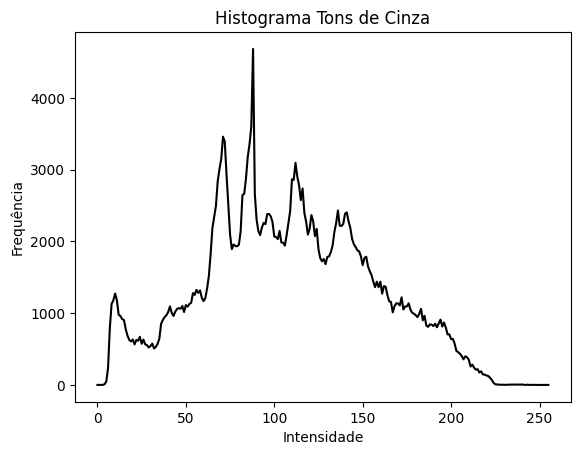

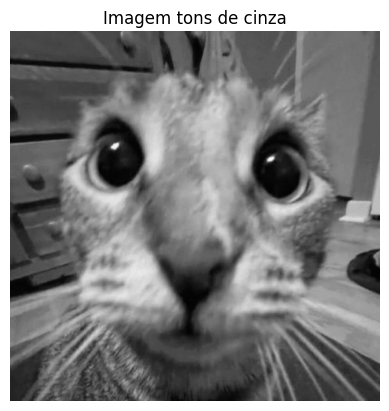

In [188]:
# Converter a imagem para tons de cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calcular o histograma para tons de cinza
hist_gray = cv2.calcHist([img_gray], [0], None, [256], [0,256])

# Plotar o histograma
plt.figure()
plt.title('Histograma Tons de Cinza')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.plot(hist_gray, color='black')
plt.show()

# Display image
plt.imshow(img_gray, cmap='gray')
plt.title('Imagem tons de cinza')
plt.axis('off')
plt.show()

### Equalize

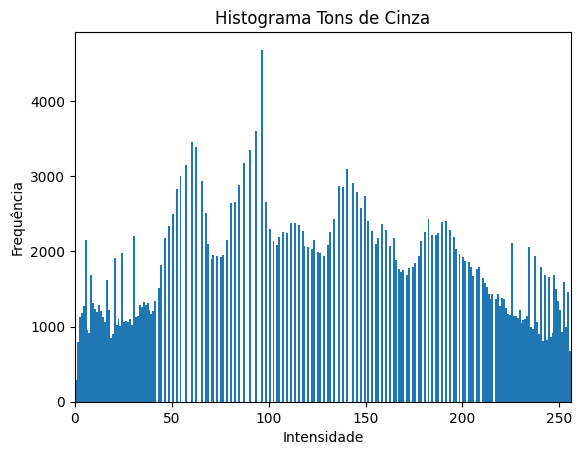

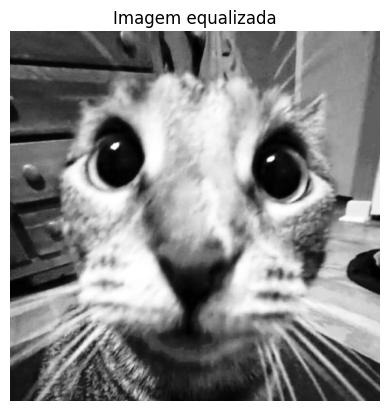

In [189]:
img_equalized = cv2.equalizeHist(img_gray)

# Plotar o histograma
plt.figure()
plt.title('Histograma Tons de Cinza')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.hist(img_equalized.ravel(), 256, [0, 256])
plt.xlim([0, 256])
plt.show()

# Display image
plt.imshow(img_equalized, cmap='gray')
plt.title('Imagem equalizada')
plt.axis('off')
plt.show()

### Blur

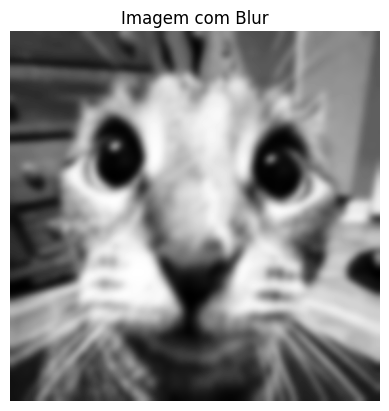

In [190]:
img_blur = cv2.GaussianBlur(img_equalized, (31, 31), 0)

# Mostrar a imagem binarizada
plt.imshow(img_blur, cmap='gray')
plt.title('Imagem com Blur')
plt.axis('off')
plt.show()

### Otsu

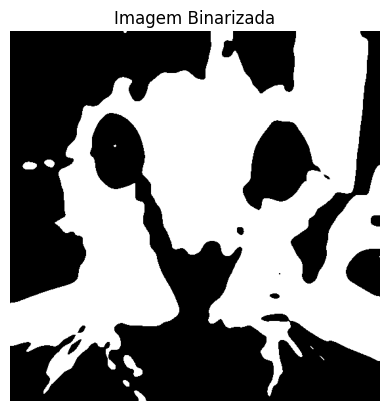

In [191]:
# Aplicar a técnica de Otsu para obter o limiar ótimo
_, binarized_image = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar a imagem binarizada
plt.imshow(binarized_image, cmap='gray')
plt.title('Imagem Binarizada')
plt.axis('off')
plt.show()